# GEDA: Inspecciones realizadas a establecimientos de comida en la ciudad de Chicago

Análisis exploratorio gráfico realizado en los datos de visitas de inspecciones realizadas a establecimientos de comida en la ciudad de Chicago. Los datos se encuentran en [esta liga](https://data.cityofchicago.org/Health-Human-Services/Food-Inspections/4ijn-s7e5). El equipo de consultoría de datos está conformado por:

* José Antonio Lechuga Rivera
* Carlos Bautista
* Mario Arturo Heredia Trejo
* Enrique Ortiz Casillas

## Generalidades de los datos

### Ingesta y estandarización de nombres de variables

In [1]:
import pandas as pd
import re

In [2]:
data_path = '../data/Food_Inspections.csv'

In [3]:
def standarize_column_names(df):
    names = {}
    for column in df.columns:
        std_name = column.lower()
        std_name = re.sub('[#]', '', std_name)
        std_name = re.sub(' $', '', std_name)
        std_name = re.sub(' ', '_', std_name)
        names[column] = std_name
        
    return df.rename(columns=names)


def clean_ingestion(path):
    df = pd.read_csv(path)
    df = standarize_column_names(df)
    return df

In [4]:
chicago_df = clean_ingestion(data_path)
chicago_df.head()

,inspection_id,dba_name,aka_name,license,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


### Preguntas preliminares

In [5]:
def get_datatypes(df):
    types_df  = pd.DataFrame(df.dtypes)
    types_df.columns = ['dtype'] 
    return types_df


def count_missing_values(df):
    #counting missing observations
    na_df = pd.DataFrame(df.isnull().sum())
    na_df.columns = ['missing_observations']
    
    na_df['percentage'] = (na_df.missing_observations / df.shape[0]).mul(100).round(2).astype(str)+'%'
   
    # formatting numeric values with commas
    na_df.missing_observations = na_df.missing_observations.map('{:,}'.format)
    na_df = pd.DataFrame(data=na_df)
    
    return na_df


def count_nunique(df):
    # getting number of unique vales
    nunique_df = df.nunique()
    nunique_df = pd.DataFrame(data=nunique_df)
    nunique_df.columns = ['unique_observations']
    
    nunique_df['percentage'] = (nunique_df.unique_observations / df.shape[0]).mul(100).round(2).astype(str)+'%'
    
    # formatting numeric values with commas
    nunique_df.unique_observations = nunique_df.unique_observations.map('{:,}'.format)
    nunique_df = pd.DataFrame(data=nunique_df)
    
    return nunique_df


def value_counts_visual_report(df, column, sort_by_values=True, ascending=False):
    count = df[column].value_counts()
    count_df = pd.DataFrame(data={column: count.index, 'observations': count.values})
    
    if sort_by_values:
        count_df.sort_values(by=['observations'], inplace=True, ignore_index=True, ascending=ascending)
    else:
        count_df.sort_values(by=[column], inplace=True, ignore_index=True, ascending=ascending)
        
    count_df['percentage'] = (count_df.observations / count_df.observations.sum()).mul(100).round(2).astype(str)+'%'
    count_df.observations = count_df.observations.map('{:,}'.format)
        
    return count_df


def value_counts_report(df, column, sort_by_values=True, ascending=False):
    count = df[column].value_counts()
    count_df = pd.DataFrame(data={column: count.index, 'observations': count.values})
    
    if sort_by_values:
        count_df.sort_values(by=['observations'], inplace=True, ignore_index=True, ascending=ascending)
    else:
        count_df.sort_values(by=[column], inplace=True, ignore_index=True, ascending=ascending)
        
    return count_df

#### ¿Con cuántas observaciones se cuenta?

In [6]:
print(f"Se tienen {chicago_df.shape[0]:,} observaciones en la bases de datos.")

Se tienen 215,130 observaciones en la bases de datos.


#### ¿Cuántas variables se tienen por observación?

In [7]:
print(f"Se tienen {chicago_df.shape[1]:,} variables por observación.")

Se tienen 17 variables por observación.


#### ¿Qué significan estas variables?

* `inpsection_id` – número identificador único de la observación
* `dba_name` – nombre del establecimiento inspeccionado
* `aka_name` – alias del establecimiento inspeccionado
* `license` – número de liciencia
* `facility_type` – tipo de establecimiento
* `risk` – nivel de riesgo asignando a establecimiento en términos de salubridad
* `address` – dirección
* `city` – ciudad
* `state` – estado
* `zip` – código postal
* `inspection_type` – tipo de inspección realizada
* `results` – resultado de la inspección realizada
* `violations` – detalle de las violaciones al reglamento de salubridad por el establecimiento
* `latitude` – latitud
* `longitude` – longitud
* `location` – coordenadas geográficas

#### ¿Entre qué fechas se encuentran dichas observaciones?

In [8]:
ordered_df = chicago_df.copy()
ordered_df['inspection_date'] = pd.to_datetime(ordered_df['inspection_date'])
ordered_df.sort_values(by="inspection_date", ascending=True)
first_date = ordered_df.tail(1).values[0][10]
last_date = ordered_df.head(1).values[0][10]
print(f"El rango de fechas va de {first_date} a {last_date}.")

El rango de fechas va de 2010-01-12 00:00:00 a 2021-01-07 00:00:00.


#### ¿Qué tipos de datos son las variables con las que se cuenta?

In [9]:
get_datatypes(chicago_df)

,dtype
inspection_id,int64
dba_name,object
aka_name,object
license,float64
facility_type,object
risk,object
address,object
city,object
state,object
zip,float64


#### ¿Cuántas observaciones faltantes tenemos por variable?

In [10]:
count_missing_values(chicago_df)

,missing_observations,percentage
inspection_id,0,0.0%
dba_name,0,0.0%
aka_name,"2,487",1.16%
license,17,0.01%
facility_type,"4,892",2.27%
risk,69,0.03%
address,0,0.0%
city,158,0.07%
state,50,0.02%
zip,52,0.02%


#### ¿Cuántas observaciones únicas tenemos por variable?

In [11]:
count_nunique(chicago_df)

,unique_observations,percentage
inspection_id,"215,130",100.0%
dba_name,"28,753",13.37%
aka_name,"27,360",12.72%
license,"39,111",18.18%
facility_type,500,0.23%
risk,4,0.0%
address,"18,525",8.61%
city,70,0.03%
state,4,0.0%
zip,112,0.05%


#### ¿Qué valores toma la variable riesgo i.e., `risk`?

In [12]:
value_counts_visual_report(chicago_df, 'risk')

,risk,observations,percentage
0,Risk 1 (High),"153,869",71.55%
1,Risk 2 (Medium),"41,978",19.52%
2,Risk 3 (Low),"19,185",8.92%
3,All,29,0.01%


#### ¿Qué valores toma la variable de estado i.e., `state`?

In [13]:
value_counts_visual_report(chicago_df, 'state')

,state,observations,percentage
0,IL,"215,077",100.0%
1,WI,1,0.0%
2,NY,1,0.0%
3,IN,1,0.0%


La gran mayoría de los datos se encuentran en el estado de Illinois que es donde se ubica la ciudad de Chicago. Por este resultado es posible considerar las otras observaciones como errores en la fuente de datos y pueden ser ignoradas para los propósitos del proyecto.

#### ¿Qué valores toma la variable de resultado de la inspección i.e., `results`?

In [14]:
value_counts_visual_report(chicago_df, 'results')

,results,observations,percentage
0,Pass,"112,641",52.36%
1,Fail,"41,527",19.3%
2,Pass w/ Conditions,"32,550",15.13%
3,Out of Business,"18,709",8.7%
4,No Entry,"7,341",3.41%
5,Not Ready,"2,290",1.06%
6,Business Not Located,72,0.03%


Si consideramos los valores de **Pass** y **Pass w/ Conditions** como observaciones donde el establecimiento pasó la inspección, podemos ver que las observaciones se encuentran desbalanceadas hacia pase de inspección en aproximadamente 50 puntos porcentuales. Se debe tener consideración en este aspecto en el futuro del proyecto.

#### ¿Existen faltas de ortografía en los datos?
Sí, principalmente podemos observar errores ortográficos y/o de catpura en la variable correspondiente a la ciudad i.e., `city`. Algunos ejemplos de errores de captura son:

In [15]:
value_counts_visual_report(chicago_df, 'city').head(10)

,city,observations,percentage
0,CHICAGO,"214,227",99.65%
1,Chicago,347,0.16%
2,chicago,111,0.05%
3,CCHICAGO,48,0.02%
4,SCHAUMBURG,27,0.01%
5,MAYWOOD,15,0.01%
6,CHicago,14,0.01%
7,ELK GROVE VILLAGE,13,0.01%
8,EVANSTON,12,0.01%
9,CHICAGOCHICAGO,10,0.0%


En este caso también encontramos que la mayoría de las observaciones se encuentran en la ciudad de Chicago (como era de esperarse). Por lo será recomendable agrupar todas las formas de captura de Chicago en una sola denominación e ignorar el resto de las observaciones pertenecientes a otras ciudades.

#### ¿Qué tipo de instalación (`facility_type`) predomina?

In [16]:
value_counts_visual_report(chicago_df, 'facility_type').head(10)

,facility_type,observations,percentage
0,Restaurant,"143,249",68.14%
1,Grocery Store,"28,093",13.36%
2,School,"13,206",6.28%
3,Children's Services Facility,"3,711",1.77%
4,Bakery,"3,153",1.5%
5,Daycare (2 - 6 Years),"2,838",1.35%
6,Daycare Above and Under 2 Years,"2,665",1.27%
7,Long Term Care,"1,430",0.68%
8,Catering,"1,314",0.63%
9,Liquor,937,0.45%


#### ¿Qué tipo de inspección (`inspection_type`) predomina?

In [17]:
value_counts_visual_report(chicago_df, 'inspection_type').head(10)

,inspection_type,observations,percentage
0,Canvass,"114,250",53.11%
1,License,"28,302",13.16%
2,Canvass Re-Inspection,"22,836",10.62%
3,Complaint,"19,912",9.26%
4,License Re-Inspection,"9,632",4.48%
5,Complaint Re-Inspection,"8,208",3.82%
6,Short Form Complaint,"7,268",3.38%
7,Suspected Food Poisoning,876,0.41%
8,Consultation,674,0.31%
9,License-Task Force,604,0.28%


### Reporte Gráfico

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

from matplotlib.ticker import FuncFormatter

In [20]:
sns.set_context('talk')

%matplotlib inline

In [21]:
def number_formatter_i(number, pos = None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000
    return '%d%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])


def number_formatter_f(number, pos = None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

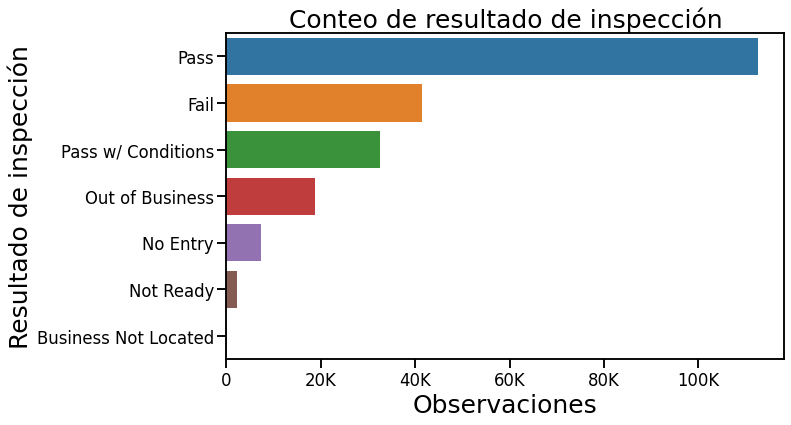

In [22]:
results_count = value_counts_report(chicago_df, 'results')
plt.figure(figsize=(10,6))
ax = sns.barplot(x='observations', 
                 y="results", 
                 data=results_count,
                 order=results_count.sort_values('observations',ascending=False).results)
# set labels
plt.xlabel("Observaciones", size=25)
plt.ylabel("Resultado de inspección", size=25)
plt.title("Conteo de resultado de inspección", size=25)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter_i))

Como se mencionó anteriormente, podemos observar que la mayoría de las inspecciones realizadas tienen resultado de pase (**Pass** y **Pass w/ Conditions**) por lo que es importante verificar que exista un buen balance en el número de observaciones de cada tipo en el modelado. En lo futuro se considera que una buena agrupación de esta variable será `pase` (**Pass** y **Pass w/ Conditions**), `fallo` (**Fail**) y `no_realizada` (**Out of Business**, **No Entry**, **Not Ready**, **Business Not Located**), pudiendo ignorar las observaciones de esta última dados los objetivos del proyecto.

In [23]:
chicago_map = gpd.read_file('./shapefiles/chicago.geojson')

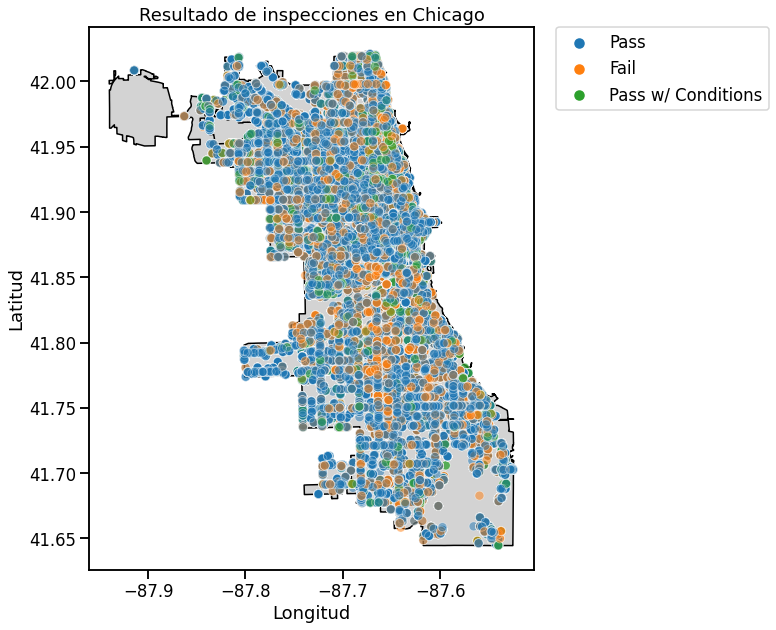

In [80]:
plt.rcParams['figure.figsize'] = (20, 10)

base_map = chicago_map.plot(facecolor='lightgray', edgecolor='black')
plt.title("Resultado de inspecciones en Chicago");
plt.xlabel("Longitud");
plt.ylabel("Latitud");

sns.scatterplot(
    data=chicago_df[(chicago_df.results=='Pass') | (chicago_df.results=='Pass w/ Conditions') | (chicago_df.results=='Fail')], 
    x='longitude',  
    y='latitude', 
    hue='results',
    alpha = 0.5);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Del mapa anterior observamos que se encuentran bien distribuidas geográficamente las inspecciones qe resultaron tanto en `pase` (i.e., **Pass** y **Pass w/conditions**) como en `fallo`(i.e., **Fail**). En este caso se omitieron los valores de **Out of Business**, **No Entry**, **Not Ready**, **Business Not Located** ya que afectaban la inspección visual. 

Adicionalmente es de notar que la gran mayoría de las observaciones se encuentran dentro de la ciudad de Chicago salvo en algunas excepciones donde se encuentran en las cercanías de la frontera política de esta.

## Serie de tiempo de inspecciones

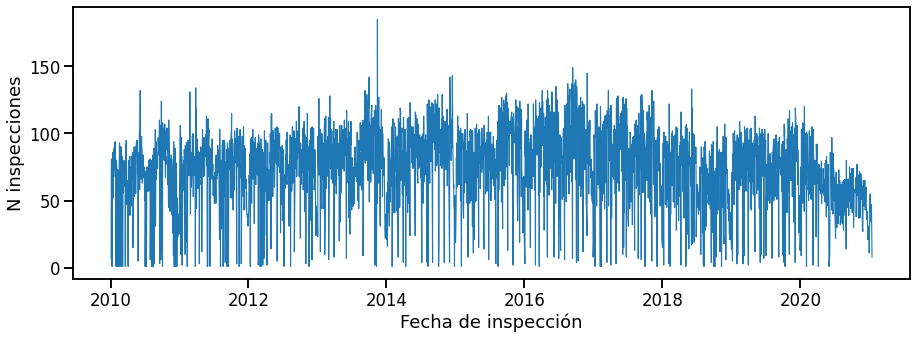

In [74]:
chicago_df['inspection_date'] = pd.to_datetime(chicago_df['inspection_date'])
inspecciones_diarias = chicago_df.groupby(['inspection_date']).size().reset_index(name = "n")

f = plt.subplots(figsize = (15,5))
plt.xlabel("Fecha de inspección")
plt.ylabel("N inspecciones")
g = sns.lineplot(data = inspecciones_diarias, x = 'inspection_date', y = 'n', size = 0.01)

g.legend_.remove()


De este gráfico podemos observar que, en general, se ha mantenido constante el rango de número de inspecciones diarias a lo largo del tiempo. Con números entre 0 y 150 inspecciones por día.

### Facility Type vs. Results

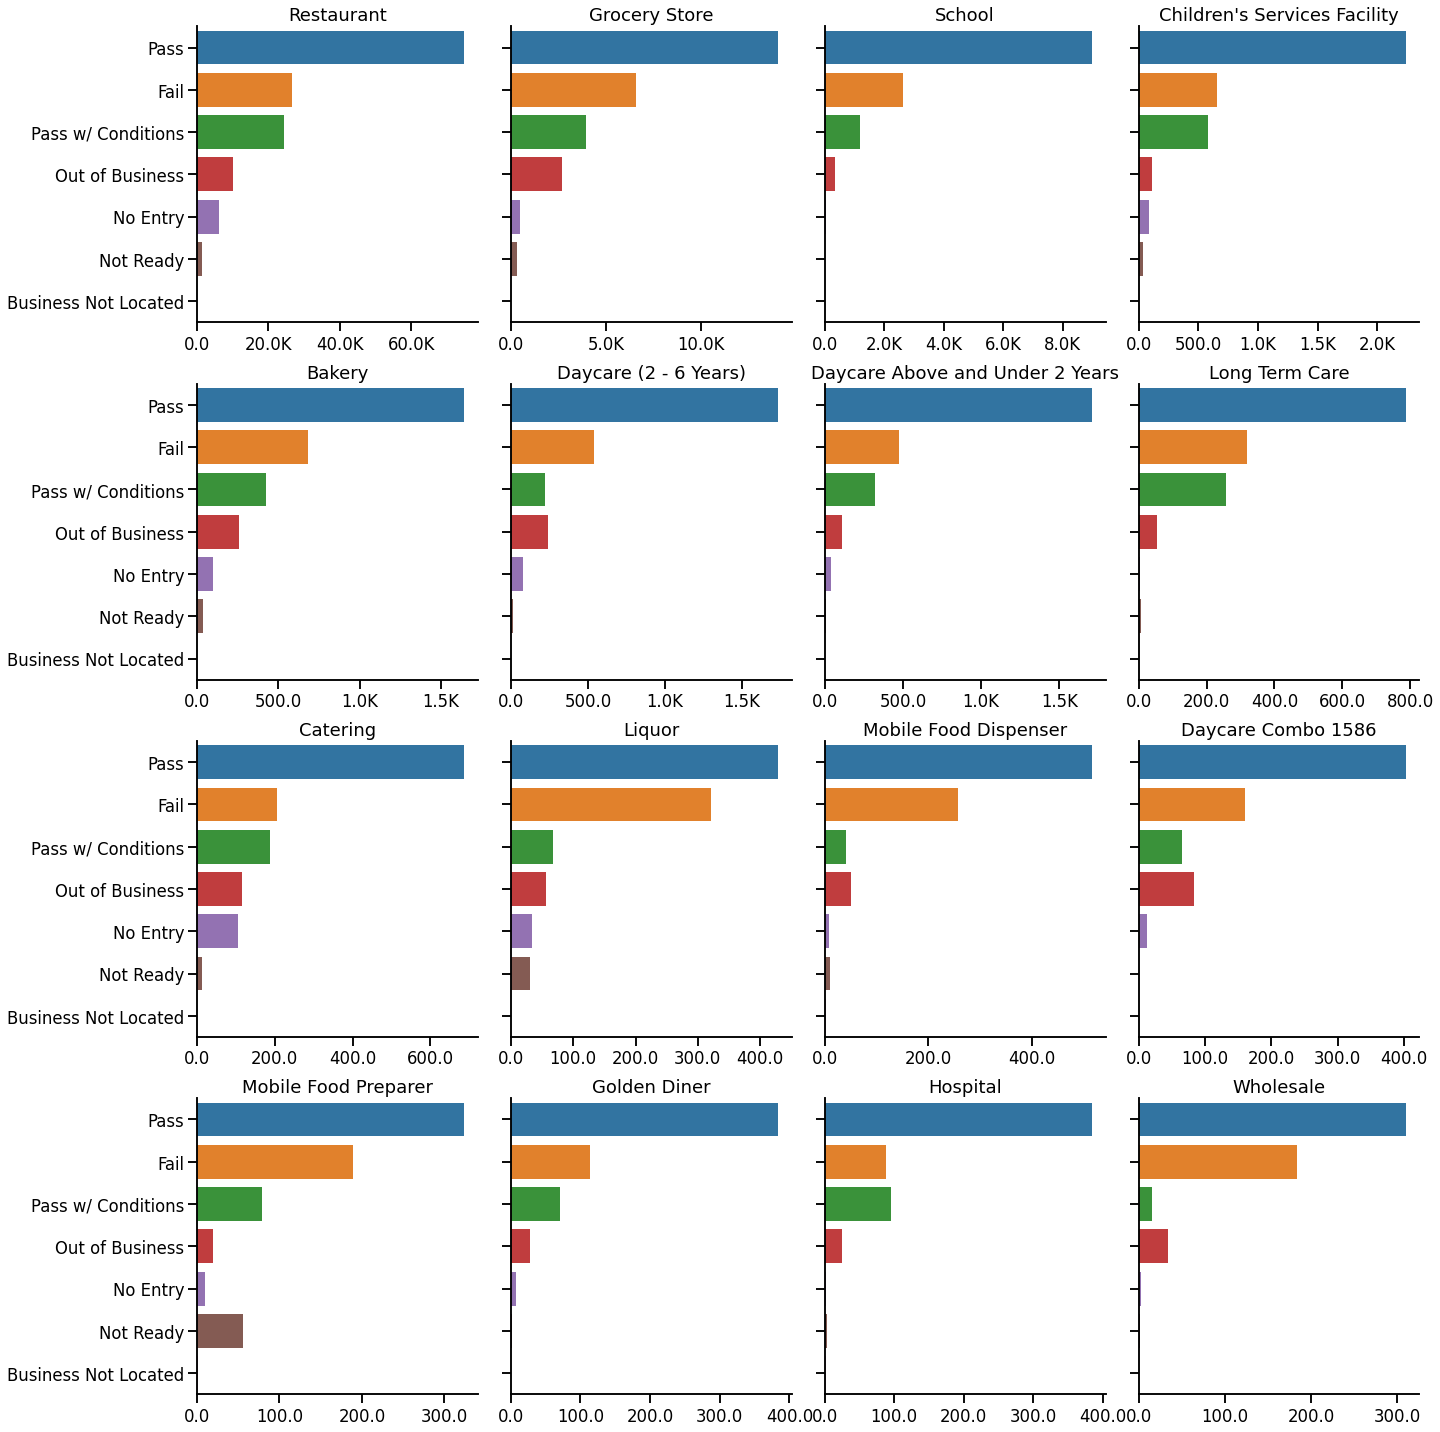

In [79]:
results_order = chicago_df.results.value_counts().index
top_facility_types = chicago_df['facility_type'].value_counts().head(16).index.array
chicago_df_filt_facility_type = chicago_df[chicago_df['facility_type'].isin(top_facility_types)]

g = sns.catplot(
    data = chicago_df_filt_facility_type,
    col = 'facility_type',
    y = 'results',
    kind = 'count',
    col_wrap=4,
    col_order = top_facility_types,
    order = results_order,
    sharex = False)  

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
#plt.title("Tipo de establecimientovs. Resultado")

for x in range(16):
    g.axes[x].set_xlabel('')
    g.axes[x].set_ylabel('')
    
for ax in g.axes.flat:   
    ax.xaxis.set_major_formatter(FuncFormatter(number_formatter_f))


Se aprecia que la proporción de cada valor de Results varía según el tipo de establecimiento. Por ejemplo, las Licorerías (Liquor) tienen una proporción más alta de fallos que el resto, mientras que las guarderías de niños menores a 2 años tienen una tasa de inspecciones fallidas menor al resto.

También es importante apreciar que los distintos tipos de establecimiento no están representados en la misma magnitud. Restaurante es el tipo de establecimiento más frecuente, mientras que Hospitales y Almacenes de mayoreo (Wholesale) son los menos frecuentes del top 16. 

### Risk vs Results

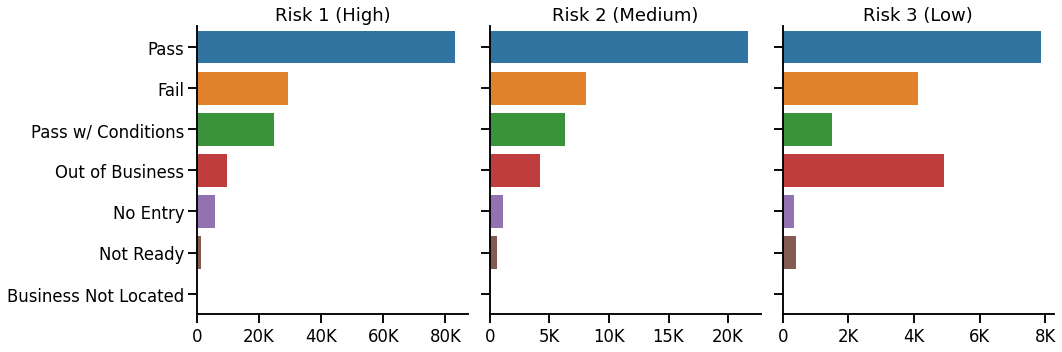

In [71]:
risk_order = chicago_df[chicago_df.risk != "All"].risk.value_counts().index

g = sns.catplot(
    data = chicago_df[chicago_df.risk != "All"],
    col = 'risk',
    y = 'results',
    kind = 'count',
    col_wrap=3,
    order = results_order,
    col_order = risk_order,
    sharex = False)  

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')

for x in range(3):
    g.axes[x].set_xlabel('')
    g.axes[x].set_ylabel('')
    
for ax in g.axes.flat:   
    ax.xaxis.set_major_formatter(FuncFormatter(number_formatter_i));